

## Suavizado exponencial: 

- Técnica para suavizar datos de series de tiempo utilizando una función de ventana exponencial. 

- Difiere  del promedio móvil simple, con el tiempo las funciones exponenciales asignan pesos exponencialmente decrecientes. 
  + Los pesos mayores se asignan a los valores u observaciones recientes, mientras que los pesos menores se asignan a los valores u observaciones más antiguos. 
  
- Entre muchas funciones de ventana, en el procesamiento de señales, la función de suavizado exponencial generalmente se aplica para suavizar datos donde actúa como un filtro de paso bajo para eliminar el ruido de alta frecuencia. 
  



##  Suavizado exponencial de Holt-Winters


La suavización exponencial de Holt-Winters se utiliza para pronosticar datos de series temporales que presentan tanto una tendencia como una variación estacional. La técnica de Holt-Winters se compone de las siguientes cuatro técnicas de pronóstico superpuestas una sobre otra:

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*X_Y6h0-00wDw_vV1V3CJwQ.png)

- **Promedios ponderados:** un promedio ponderado es simplemente un promedio de $n$ números, donde a cada número se le asigna un peso determinado y el denominador es la suma de esos $n$ pesos. Los pesos se asignan a menudo según alguna función de ponderación. Las funciones de ponderación comunes son logarítmica, lineal, cuadrática, cúbica y exponencial. El promedio como técnica de pronóstico de series de tiempo tiene la propiedad de suavizar la variación en los valores históricos al calcular el pronóstico. Al elegir una función de ponderación adecuada, el pronosticador determina qué valores históricos deben enfatizarse para calcular los valores futuros de la serie de tiempo.

- **Suavizado exponencial:** la técnica de suavizado exponencial (ES) pronostica el siguiente valor utilizando un promedio ponderado de todos los valores anteriores, donde los pesos decaen exponencialmente desde el valor histórico más reciente hasta el más antiguo. Cuando se utiliza ES, se asume que los valores recientes de la serie temporal son mucho más importantes para usted que los valores más antiguos. La técnica ES tiene dos grandes deficiencias: no se puede utilizar cuando los datos muestran una tendencia o variaciones estacionales.

- **Suavizado exponencial de Holt:** la técnica Holt ES corrige una de las dos deficiencias de la técnica ES simple. Holt ES se puede utilizar para pronosticar datos de series temporales que tienen una tendencia, pero falla en presencia de variaciones estacionales en las series temporales.

- **Suavizado exponencial de Holt-Winters:** el Suavizado exponencial de Holt-Winters modifica la técnica de Holt ES para que pueda utilizarse en presencia tanto de tendencia como de estacionalidad.

## Suavizado exponencial simple

El método  se utiliza cuando no existe una tendencia o estacionalidad discernible en los datos de series temporales. Este método pondera los datos pasados ​​con ponderaciones exponencialmente decrecientes a medida que avanza hacia el pasado; es decir, cuanto más reciente sea el valor de los datos, mayor será su ponderación.

Esta ponderación supera en gran medida las limitaciones de los promedios móviles o los modelos de cambio porcentual. La ponderación utilizada se denomina medida alfa .

### Ecuación del Suavizamiento Exponencial Simple:

$$
F_t = \alpha Y_{t-1} + (1 - \alpha) F_{t-1}
$$

Donde:

- $F_t$ es el pronóstico para el tiempo $t$.
- $\alpha$ (alfa) es el factor de suavizamiento $(0 <  \alpha  < 1)$, que determina cuánto peso se asigna a la observación más reciente.
- $Y_{t-1} $ es el valor real observado en el periodo anterior.
- $ F_{t-1} $ es el pronóstico para el periodo anterior.


| Periodo (t) | Valor observado (Y) | Pronóstico anterior $F_{t-1}$ | Pronóstico actual $F_t = αY_{t-1} + (1 - α)F_{t-1}$ |
|-------------|---------------------|-------------------------------|-----------------------------------------------------|
| $t = 1$       | $Y_1$                 | N/A                           | $Y_1$ (inicialización)                                |
| $t = 2$       | $Y_2$                 | $F_1$                           | $αY_1 + (1 - α)F_1$                                   |
| $t = 3$       | $Y_3$                 | $F_2$                           | $αY_2 + (1 - α)F_2$                                   |
| $t = 4$       | $Y_4$                 | $F_3$                           | $αY_3 + (1 - α)F_3$                                   |
| ...         | ...                 | ...                           | ...                                                 |


In [2]:
# Definición de los datos
valores_observados = [10, 12, 13, 15, 18]
alpha = 0.9

# Inicializar lista de pronósticos
pronosticos = [valores_observados[0]]  # F_1 = Y_1

# Calcular los pronósticos para t > 1
for t in range(1, len(valores_observados)):
    pronostico = alpha * valores_observados[t-1] + (1 - alpha) * pronosticos[t-1]
    pronosticos.append(pronostico)

import pandas as pd

# Crear DataFrame para visualizar los resultados
df_resultados = pd.DataFrame({
    'Periodo (t)': list(range(1, len(valores_observados) + 1)),
    'Valor observado (Y)': valores_observados,
    'Pronóstico (F)': pronosticos
})

df_resultados

,Periodo (t),Valor observado (Y),Pronóstico (F)
0,1,10,10.000
1,2,12,10.000
2,3,13,11.800
3,4,15,12.880
4,5,18,14.788


## Suavizado exponencial doble

Se utiliza muestran una tendencia pero no estacionalidad es el método de suavizado exponencial doble. El suavizado exponencial doble aplica el suavizado exponencial simple dos veces, una a los datos originales y luego a los datos resultantes del suavizado exponencial simple.

### Ecuaciones del Suavizamiento Exponencial Doble (Método de Holt):

1. **Ecuación del nivel:**

$$
S_t = \alpha Y_t + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

Donde:
- $S_t$ es el nivel suavizado en el tiempo t.
- $\alpha$ es el parámetro de suavizamiento del nivel.
- $Y_t$ es el valor observado en el tiempo t.
- $T_{t-1}$ es la estimación de la tendencia en el periodo anterior.

2. **Ecuación de la tendencia:**

$$
T_t = \beta(S_t - S_{t-1}) + (1 - \beta)T_{t-1}
$$

Donde:
- $T_t$ es la tendencia suavizada en el tiempo $t$.
- $\beta$ es el parámetro de suavizamiento para la tendencia.
- $S_t$ y $S_{t-1}$ son los niveles suavizados para los periodos $t$ y $t-1$.

3. **Ecuación de pronóstico:**

$$
F_{t+m} = S_t + m \cdot T_t
$$

Donde:
- $F_{t+m}$ es el pronóstico para $m$ periodos en el futuro.
- $S_t$ es el nivel suavizado actual.
- $T_t$ es la tendencia suavizada actual.
- $m$ es el número de periodos a pronosticar hacia adelante.


### Introducción al Suavizamiento Exponencial Triple (Método de Holt-Winters)

El **suavizamiento exponencial triple**, también conocido como el **Método de Holt-Winters**, es una técnica de pronóstico utilizada para series de tiempo que muestran patrones de nivel, tendencia y estacionalidad. Este método aplica tres niveles de suavizamiento: uno para el nivel, otro para la tendencia, y otro para la estacionalidad. Existen dos versiones del modelo de Holt-Winters: una aditiva y una multiplicativa, dependiendo de cómo se ajustan los componentes estacionales.

#### Componentes del modelo:
1. **Nivel (S_t):** Captura el nivel promedio de la serie en un momento dado.
2. **Tendencia (T_t):** Refleja la tasa de cambio del nivel de la serie.
3. **Estacionalidad (I_t):** Captura las fluctuaciones periódicas repetitivas en la serie.

### Ecuaciones del Suavizamiento Exponencial Triple (Holt-Winters)

#### 1. **Ecuación del nivel:**

Para el nivel suavizado en el tiempo t:

**Versión aditiva:**

$$
S_t = \alpha \left( Y_t - I_{t-L} \right) + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

**Versión multiplicativa:**

$$
S_t = \alpha \left( \frac{Y_t}{I_{t-L}} \right) + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

Donde:
- $Y_t$ es el valor observado en el tiempo t.
- $I_{t-L}$ es el componente estacional del mismo período en el ciclo anterior (donde L es la longitud del ciclo estacional).
- $\alpha$ es el factor de suavizamiento para el nivel.

#### 2. **Ecuación de la tendencia:**

Para la tendencia suavizada en el tiempo t:

$$
T_t = \beta(S_t - S_{t-1}) + (1 - \beta)T_{t-1}
$$

Donde:
- $T_t$ es la tendencia suavizada.
- $\beta$ es el factor de suavizamiento para la tendencia.

#### 3. **Ecuación de la estacionalidad:**

Para el componente estacional:

**Versión aditiva:**

$$
I_t = \gamma \left( Y_t - S_t \right) + (1 - \gamma)I_{t-L}
$$

**Versión multiplicativa:**

$$
I_t = \gamma \left( \frac{Y_t}{S_t} \right) + (1 - \gamma)I_{t-L}
$$

Donde:
- $I_t$ es la estacionalidad suavizada en el tiempo t.
- $\gamma$ es el factor de suavizamiento para la estacionalidad.

#### 4. **Ecuación de pronóstico:**

Para el pronóstico m periodos hacia el futuro:

**Versión aditiva:**

$$
F_{t+m} = S_t + m \cdot T_t + I_{t+m-L}
$$

**Versión multiplicativa:**

$$
F_{t+m} = (S_t + m \cdot T_t) \cdot I_{t+m-L}
$$

Donde:
- $F_{t+m}$ es el pronóstico para m periodos en el futuro.
- $I_{t+m-L}$ es el componente estacional para el periodo futuro, ajustado para el ciclo estacional.


El modelo Holt-Winters es útil cuando los datos muestran una tendencia y estacionalidad que deben considerarse al hacer predicciones.



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
airline = pd.read_csv("https://raw.githubusercontent.com/Wilsonsr/Series-de-Tiempo/main/CUADERNOS/airpassengers.csv", parse_dates=True, sep=";")
airline

,Unnamed: 0,x
0,1,112
1,2,118
2,3,132
3,4,129
4,5,121
...,...,...
139,140,606
140,141,508
141,142,461
142,143,390


In [11]:
date_range = pd.date_range(start="1949-01", end="1961-01", freq='ME')
date_range

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [12]:
airline.index=date_range

In [13]:
airline

,Unnamed: 0,x
1949-01-31,1,112
1949-02-28,2,118
1949-03-31,3,132
1949-04-30,4,129
1949-05-31,5,121
...,...,...
1960-08-31,140,606
1960-09-30,141,508
1960-10-31,142,461
1960-11-30,143,390


In [14]:
airline.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
airline.rename(columns={"x": "Cantidad de pasajeros"}, inplace=True)

In [15]:
airline

,Cantidad de pasajeros
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [16]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-31 to 1960-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Cantidad de pasajeros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
airline

,Cantidad de pasajeros
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [18]:
import seaborn as sns
sns.set_theme()

<Axes: title={'center': 'Cantidad de Pasajeros'}>

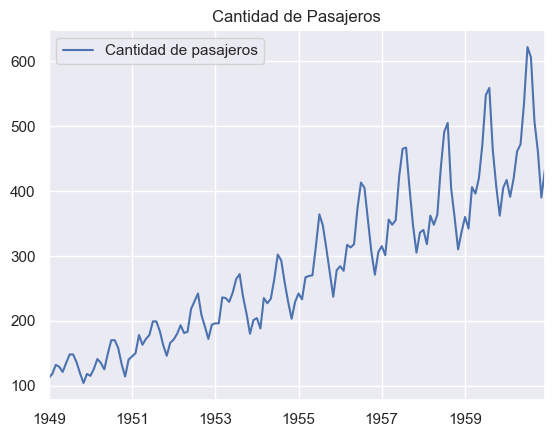

In [19]:
airline[['Cantidad de pasajeros']].plot(title='Cantidad de Pasajeros')

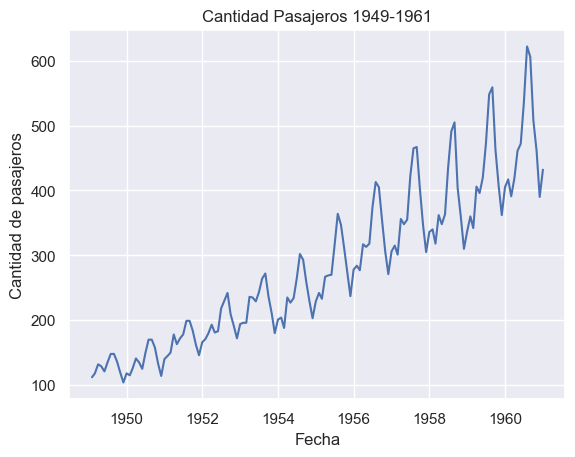

In [20]:
import seaborn as sns
sns.lineplot(data=airline, x=airline.index, y='Cantidad de pasajeros')
plt.title("Cantidad Pasajeros 1949-1961")
plt.xlabel("Fecha")
plt.show()


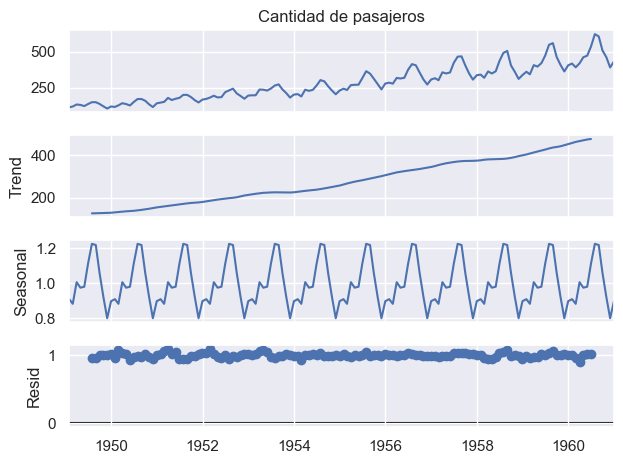

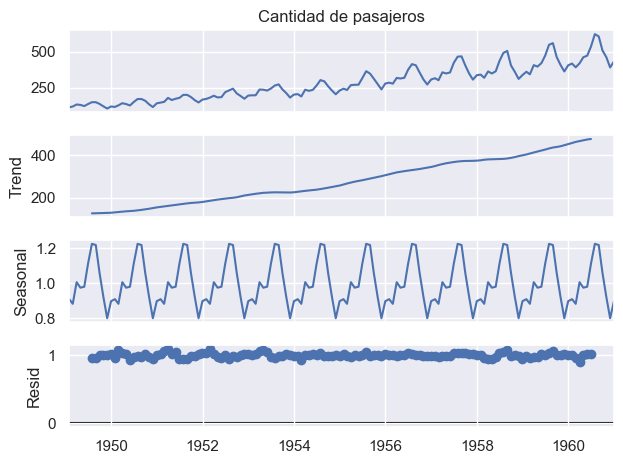

In [21]:
decompose_result = seasonal_decompose(airline["Cantidad de pasajeros"],model="multiplicative")
decompose_result.plot()

Ajuste de los datos con suavizado exponencial de Holt-Winters
Ahora ajustaremos estos datos al suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.

Antes de comenzar con los modelos, primero definiremos el coeficiente de peso Alfa y el Período de Tiempo. También configuramos la frecuencia DateTime a un nivel mensual.

In [13]:
1/24

0.041666666666666664

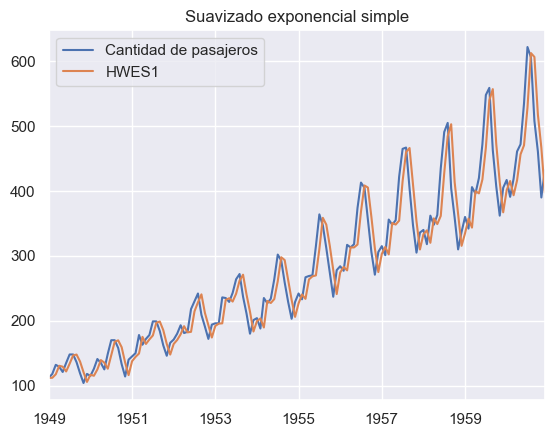

In [22]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

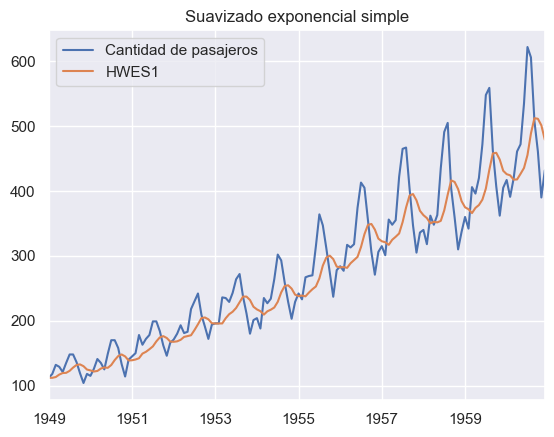

In [15]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=0.2,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

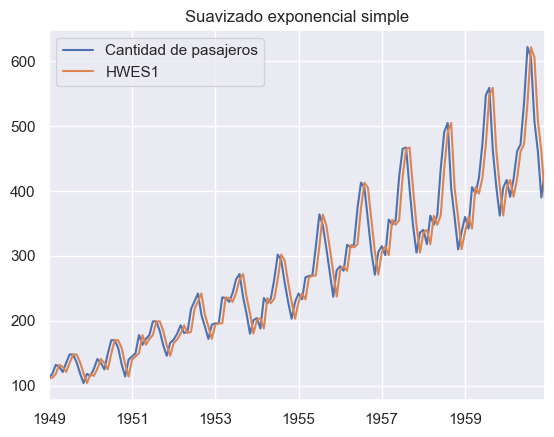

In [47]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(optimized=True,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

In [48]:
# Ajustar el modelo
model = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(optimized=True, use_brute=True)

# Obtener el valor de alpha (parámetro de suavizamiento)
alpha = model.model.params['smoothing_level']

# Mostrar el valor de alpha
print(f"El valor de alfa es: {alpha}")

El valor de alfa es: 0.995


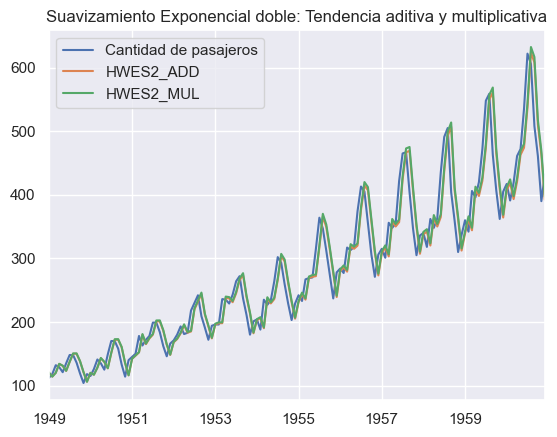

In [49]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul").fit().fittedvalues
airline[["Cantidad de pasajeros","HWES2_ADD","HWES2_MUL"]].plot(title="Suavizamiento Exponencial doble: Tendencia aditiva y multiplicativa");

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


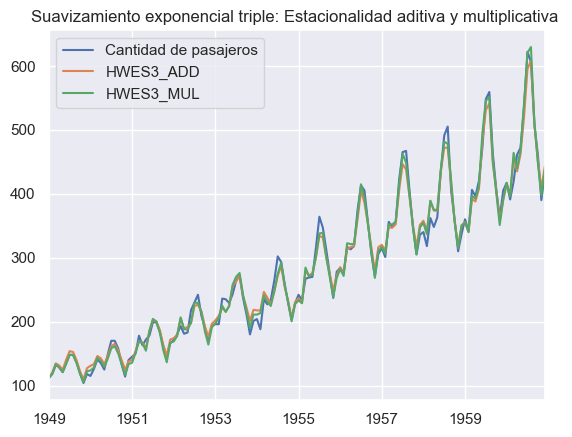

In [50]:
#Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Cantidad de pasajeros","HWES3_ADD","HWES3_MUL"]].plot(title="Suavizamiento exponencial triple: Estacionalidad aditiva y multiplicativa ");

In [51]:
# Split into train and test set
train_airline = airline[:120]
test_airline = airline[120:]

In [53]:
train_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1949-01-31,112,112.000000,120.527273,120.527273,111.959998,111.595648
1949-02-28,118,112.000000,114.102394,113.990701,120.193337,118.842606
1949-03-31,132,117.970000,120.040657,120.031669,134.676835,133.333853
1949-04-30,129,131.929850,134.001539,134.235979,131.407263,127.899963
1949-05-31,121,129.014649,131.085845,131.270786,124.643743,120.979016
...,...,...,...,...,...,...
1958-08-31,505,490.718198,492.802728,499.294645,471.614820,478.253611
1958-09-30,404,504.928591,507.014362,513.757885,414.730403,420.116311
1958-10-31,359,404.504643,406.580170,411.579115,355.898493,357.453839
1958-11-30,310,359.227523,361.298265,365.501589,317.606504,314.784992


In [52]:
test_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1959-01-31,360,336.866231,338.934275,342.740670,355.593039,355.106140
1959-02-28,342,359.884331,361.954484,366.162463,340.722991,339.829068
1959-03-31,406,342.089422,344.157599,348.058370,391.786907,396.569339
1959-04-30,396,405.680447,407.754768,412.758291,387.843077,392.258122
1959-05-31,420,396.048402,398.121584,402.962931,407.526558,411.111097
1959-06-30,472,419.880242,421.955595,427.209646,482.297029,494.682244
1959-07-31,548,471.739401,473.819745,479.976829,530.933859,545.696472
1959-08-31,559,547.618697,549.706446,557.187594,540.812420,550.595459
1959-09-30,463,558.943093,561.031805,568.715959,447.115906,453.206704
1959-10-31,407,463.479715,465.558677,471.584076,405.344087,402.161108


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


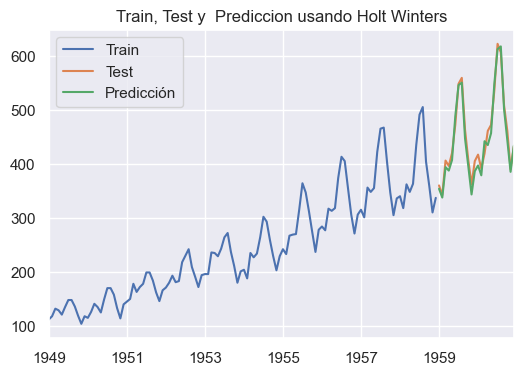

In [22]:
fitted_model = ExponentialSmoothing(train_airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="Train")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(6,4))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

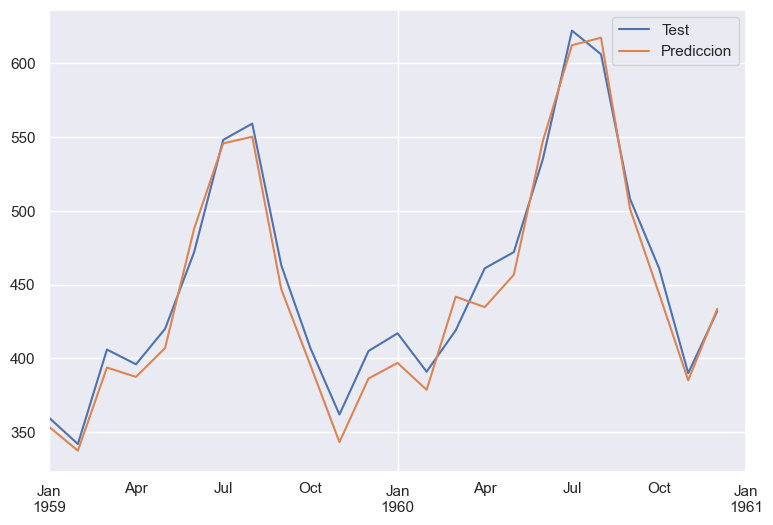

In [54]:
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion",xlim=["1959-01-01","1961-01-01"]);

In [55]:
test_predictions

1959-01-31    353.807396
1959-02-28    337.555643
1959-03-31    393.806030
1959-04-30    387.476190
1959-05-31    407.013603
1959-06-30    487.824131
1959-07-31    545.610812
1959-08-31    550.129220
1959-09-30    446.734901
1959-10-31    395.511073
1959-11-30    343.290056
1959-12-31    386.375412
1960-01-31    396.933962
1960-02-29    378.701238
1960-03-31    441.808141
1960-04-30    434.706738
1960-05-31    456.625622
1960-06-30    547.286370
1960-07-31    612.116829
1960-08-31    617.185998
1960-09-30    501.188658
1960-10-31    443.721016
1960-11-30    385.134634
1960-12-31    433.471784
Freq: ME, dtype: float64

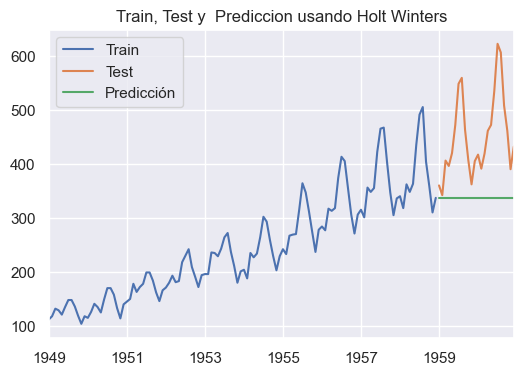

In [59]:
fitted_model_1 = SimpleExpSmoothing(train_airline["Cantidad de pasajeros"]).fit(optimized=True )
test_predictions_1 = fitted_model_1.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="Train")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(6,4))
test_predictions_1.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

### 1. MAE (Mean Absolute Error)
$$
MAE = \frac{1}{n} \sum_{t=1}^{n} |Y_t - \hat{Y}_t|
$$
Donde:
-  $Y_t$ es el valor real en el tiempo $ t $.
-  $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 2. MSE (Mean Squared Error)
$$
MSE = \frac{1}{n} \sum_{t=1}^{n} (Y_t - \hat{Y}_t)^2
$$
Donde:
- $Y_t$ es el valor real en el tiempo $t$.
- $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 3. RMSE (Root Mean Squared Error)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (Y_t - \hat{Y}_t)^2}
$$
Donde:
- $Y_t$ es el valor real en el tiempo $t$.
- $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 4. MAPE (Mean Absolute Percentage Error)
$$
MAPE = \frac{100}{n} \sum_{t=1}^{n} \left| \frac{Y_t - \hat{Y}_t}{Y_t} \right|
$$
Donde:
- $Y_t$ es el valor real en el tiempo \( t \).
-  $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.


In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(test_airline["Cantidad de pasajeros"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(test_airline["Cantidad de pasajeros"],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(test_airline['Cantidad de pasajeros'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(test_airline["Cantidad de pasajeros"], test_predictions)*100:.2f}%")

MAE 12.38
MSE: 192.62
RMSE: 13.88
MAPE: 2.81%


In [26]:
gas=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/gas.csv", sep=";")
gas

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173
...,...,...
471,472,49013
472,473,56624
473,474,61739
474,475,66600


In [30]:
fecha=pd.date_range(start="1956-01", end="1995-09", freq="ME")
fecha

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='ME')

In [31]:
gas.index=fecha

In [32]:
gas

,Unnamed: 0,x
1956-01-31,1,1709
1956-02-29,2,1646
1956-03-31,3,1794
1956-04-30,4,1878
1956-05-31,5,2173
...,...,...
1995-04-30,472,49013
1995-05-31,473,56624
1995-06-30,474,61739
1995-07-31,475,66600


In [36]:
gas.drop("Unnamed: 0", axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [41]:
gas.rename(columns={"x":"Produccion"}, inplace=True)